<a href="https://colab.research.google.com/github/malikumarali/malikumarali/blob/main/housedatapredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkF

In [ ]:
# Load dataset
data = pd.read_csv("train.csv")
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]
print(data.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Normalize numerical features
numerical_features = X.select_dtypes(include=np.number).columns
X[numerical_features] = (X[numerical_features] - X[numerical_features].mean()) / X[numerical_features].std()
# Handle categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features,
                          columns=encoder.get_feature_names_out(categorical_features),
                          index=X.index)
X = pd.concat([X.drop(categorical_features, axis=1), encoded_df], axis=1)


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression from scratch
class LinearRegression:
    def __init__(self, alpha=1e-6):  # Added small regularization
        self.weights = None
        self.bias = None
        self.alpha = alpha  # Regularization strength

    def fit(self, X, y):
        # Add bias term and apply regularization
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        identity = np.eye(X.shape[1])
        identity[0, 0] = 0  # Don't regularize bias term
        self.weights = np.linalg.lstsq(
            X.T @ X + self.alpha * identity,  # Regularized matrix
            X.T @ y,
            rcond=None
        )[0]
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

In [ ]:
# 1. Remove columns with zero variance
X = X.loc[:, X.nunique() > 1]  # Remove constant columns

# 2. Handle NaN values (from possible zero-division in normalization)
X = X.fillna(0)  # Replace NaNs with 0

# 3. Split data AFTER preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert X_test and y_test to numpy arrays for prediction if needed, but keep training data as DataFrame
X_test = X_test.values.astype(np.float64)
y_test = y_test.values.astype(np.float64)
# X_train and y_train remain as Pandas DataFrames


In [ ]:
# First, update the DecisionTree class to track feature importance
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None
        self.feature_importances_ = None  # Add feature importance tracking

    def _find_best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                if len(y[left_indices]) == 0 or len(y[~left_indices]) == 0:
                    continue
                left_mse = np.var(y[left_indices]) * len(y[left_indices])
                right_mse = np.var(y[~left_indices]) * len(y[~left_indices])
                total_mse = left_mse + right_mse

                if total_mse < best_mse:
                    best_mse = total_mse
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(y) < 2:
            return np.mean(y)

        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return np.mean(y)

        # Track feature importance
        self.feature_importances_[feature] += 1

        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices

        tree = {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth+1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth+1)
        }
        return tree

    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])  # Initialize
        self.tree = self._build_tree(X.values, y.values)
        # Normalize feature importances
        if self.feature_importances_.sum() > 0:
            self.feature_importances_ = self.feature_importances_ / self.feature_importances_.sum()

    def predict_single(self, x, tree): # Added the missing predict_single method
        if not isinstance(tree, dict):
            return tree
        if x[tree['feature']] <= tree['threshold']:
            return self.predict_single(x, tree['left'])
        else:
            return self.predict_single(x, tree['right'])

    def predict(self, X):
        # Check if X is a DataFrame and if so, convert it to a NumPy array
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x, self.tree) for x in X_array])

In [ ]:
# Update RandomForest and XGBoost classes to aggregate feature importances
class RandomForest:
    def __init__(self, n_trees=10, max_depth=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.feature_importances_ = None

    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample = X.iloc[indices]  # <--- Potential Error Here
            y_sample = y.iloc[indices]  # <--- Potential Error Here

            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            self.feature_importances_ += tree.feature_importances_

        # Normalize feature importances
        if self.n_trees > 0:
            self.feature_importances_ /= self.n_trees

    def predict(self, X):
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        predictions = np.array([tree.predict(X_array) for tree in self.trees])
        return np.mean(predictions, axis=0)
class XGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_pred = None
        self.feature_importances_ = None

    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])
        self.initial_pred = np.mean(y)
        predictions = np.full_like(y, self.initial_pred, dtype=float)

        for _ in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)  # <--- Potential Error Here

            self.trees.append(tree)
            predictions += self.learning_rate * tree.predict(X)
            self.feature_importances_ += tree.feature_importances_

        # Normalize feature importances
        if self.n_estimators > 0:
            self.feature_importances_ /= self.n_estimators

    def predict(self, X):
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        predictions = np.full(len(X), self.initial_pred, dtype=float)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X_array)
        return predictions


In [ ]:
class LinearRegression:
    def __init__(self, alpha=1e-6):
        self.weights = None
        self.bias = None
        self.alpha = alpha

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        identity = np.eye(X.shape[1])
        identity[0, 0] = 0  # Don't regularize bias term
        self.weights = np.linalg.lstsq(
            X.T @ X + self.alpha * identity,
            X.T @ y,
            rcond=None
        )[0]
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

In [ ]:
# Update the plotting function
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.tight_layout()
    plt.show()


In [ ]:

# Initialize and train the models
models = {
    "Linear Regression": LinearRegression(alpha=1e-5),
    "Random Forest": RandomForest(n_trees=10, max_depth=5),
    "XGBoost": XGBoost(n_estimators=10, learning_rate=0.1, max_depth=3)
}

results = {}
for name, model in models.items():
  print(f"Type of X_train: {type(X_train)}")
  print(f"Shape of X_train: {X_train.shape}")
  print(f"Type of y_train: {type(y_train)}")
  print(f"Shape of y_train: {y_train.shape}")
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  r2 = r2_score(y_test, predictions)
  results[name] = (rmse, r2)
  print(f"{name} RMSE: {rmse:.4f}, R²: {r2:.4f}")

Type of X_train: <class 'pandas.core.frame.DataFrame'>
Shape of X_train: (1168, 304)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (1168,)
Linear Regression RMSE: 64965.1198, R²: 0.4498
Type of X_train: <class 'pandas.core.frame.DataFrame'>
Shape of X_train: (1168, 304)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (1168,)
Random Forest RMSE: 35757.9149, R²: 0.8333
Type of X_train: <class 'pandas.core.frame.DataFrame'>
Shape of X_train: (1168, 304)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (1168,)
XGBoost RMSE: 49200.3751, R²: 0.6844


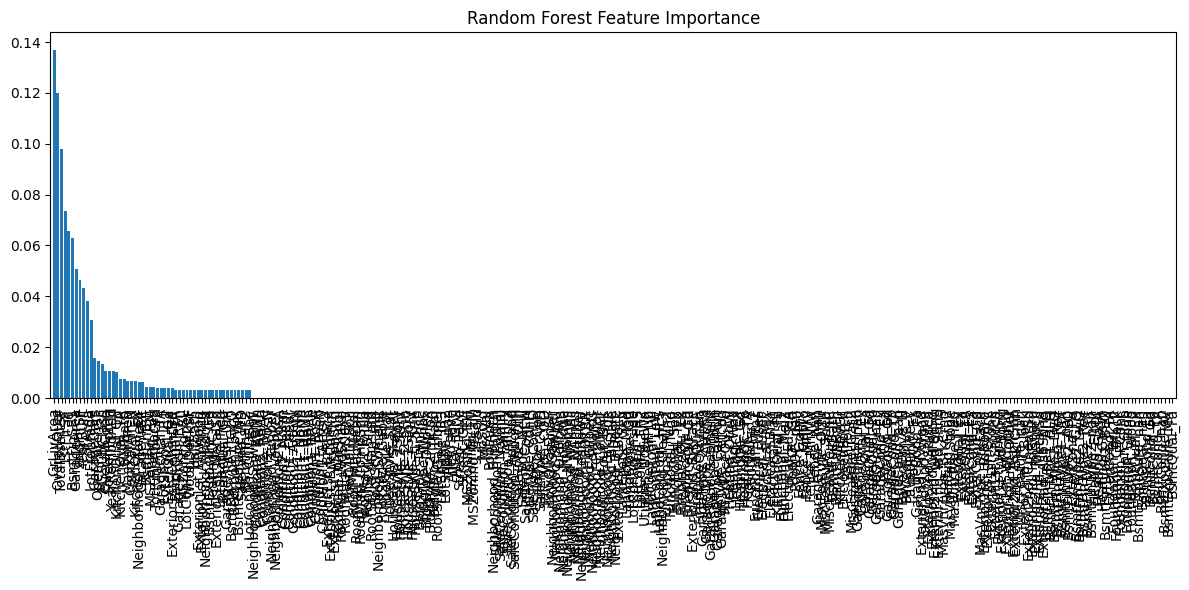

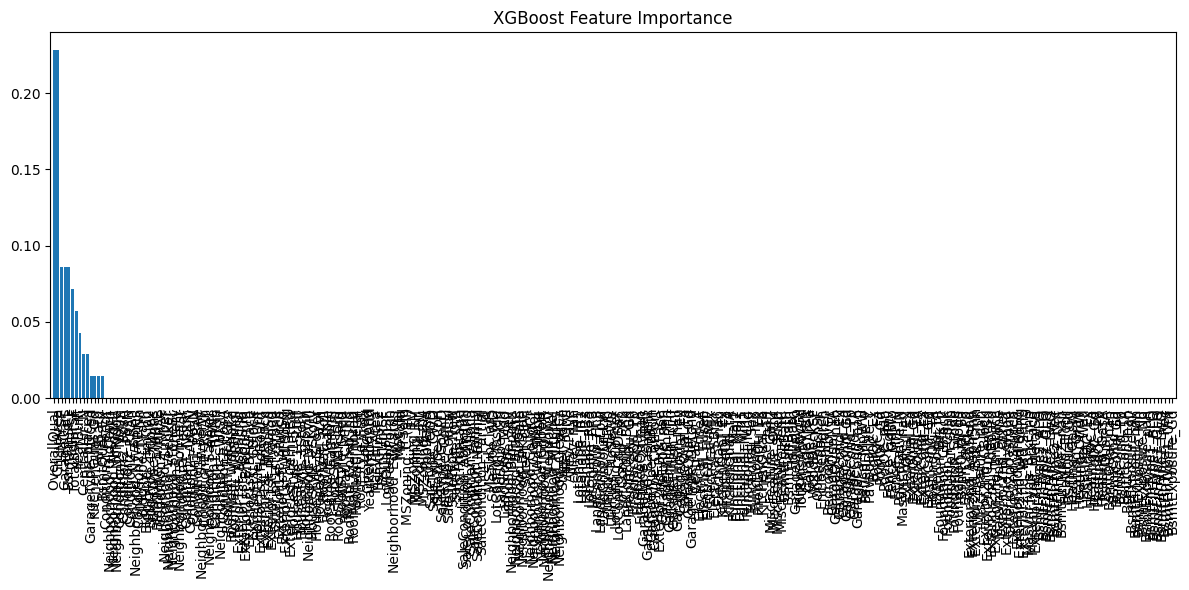

In [ ]:
# Plot feature importances
plot_feature_importance(models["Random Forest"], X.columns, "Random Forest Feature Importance")
plot_feature_importance(models["XGBoost"], X.columns, "XGBoost Feature Importance")